In [2]:
import os
import pickle as pkl
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append(os.path.join(os.getcwd(), '..', '..', '..'))
from settings import RESULTS_PATH

In [3]:
os.listdir(RESULTS_PATH)

['sigmoid_relu_experiment.pkl',
 'batch_size_experiment.pkl',
 'layer_size_experiment.pkl']

In [4]:
experiment_path = os.path.join(RESULTS_PATH, 'layer_size_experiment.pkl')

In [5]:
with open(experiment_path, 'rb') as file:
    results = pkl.load(file)

In [6]:
results = [item for sublist in results for item in sublist]

In [7]:
results = pd.DataFrame(results)

In [8]:
results.columns = ['train_loss', 'val_loss', 'test_loss', 'train_accuracy', 'val_accuracy',
                   'test_accuracy', 'Wielkość warstwy', 'epoch']
# results['layer_size'] = results['layer_size'].astype(str)
results.head()

,train_loss,val_loss,test_loss,train_accuracy,val_accuracy,test_accuracy,Wielkość warstwy,epoch
0,2.488465,2.487259,2.517020,0.08650,0.0868,0.0871,10,0
1,2.423519,2.418088,2.424363,0.09648,0.0980,0.0955,32,0
2,2.393399,2.388119,2.403385,0.10408,0.1061,0.1043,128,0
3,2.537856,2.525242,2.515731,0.10928,0.1132,0.1107,512,0
4,2.575267,2.577254,2.573250,0.09856,0.0979,0.1021,1024,0


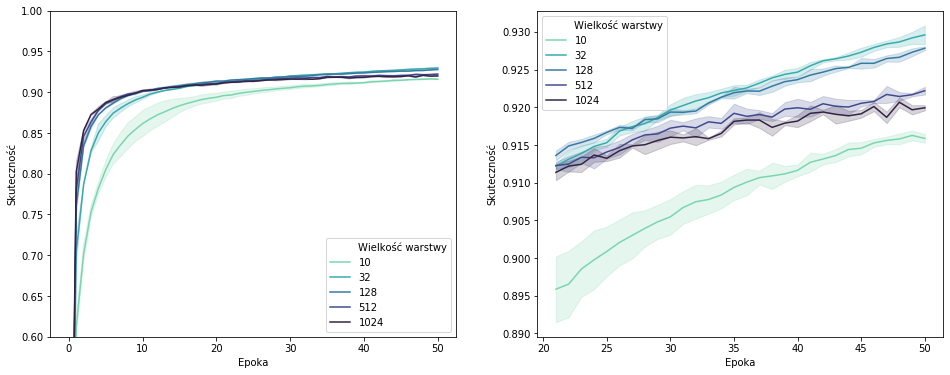

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
palette = sns.color_palette("mako_r", 5)
sns.lineplot(x='epoch', 
             y='val_accuracy', 
             hue='Wielkość warstwy', 
             hue_order=sorted(results['Wielkość warstwy'].unique()),
             data=results, 
             ax=ax[0],
             legend="full", palette=palette, ci='sd')

sns.lineplot(x='epoch', 
             y='val_accuracy', 
             hue='Wielkość warstwy', 
             hue_order=sorted(results['Wielkość warstwy'].unique()),
             data=results[results['epoch']>20], 
             ax=ax[1],
             legend="full", 
             palette=palette,
             ci='sd')
ax[0].set_ylabel('Skuteczność')
ax[0].set_ylim(0.6, 1.0)
ax[0].set_xlabel('Epoka')
ax[1].set_ylabel('Skuteczność')
ax[1].set_xlabel('Epoka')
plt.show()

## Store results